## Model Development

Now that we have our cleaned data with required features, lets proceed with model development 

Importing Libraries

In [35]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
#import lightgbm as ltb

from math import sqrt

%matplotlib inline

Loading our data into dataframe

In [36]:
df_properties = pd.read_csv('cleaned_property_data_rent.csv')
#df_properties = df_properties.dropna(column='amenities',axis=1)
df_properties = df_properties.drop(columns = ['amenities','price_per_sqft','neighborhood'],axis=1)

df_properties = pd.get_dummies(df_properties, columns=['quality', ])
df_properties.head()
#partly_furnished

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,partly_furnished,balcony,barbecue_area,...,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,quality_High,quality_Low,quality_Medium,quality_Ultra
0,8935194,25.065806,55.233004,34000,468,0,1,False,True,False,...,False,False,False,True,False,False,0,0,1,0
1,8922509,25.215192,55.235827,700000,1620,1,2,True,True,False,...,False,False,False,False,False,False,0,0,1,0
2,8919569,25.061118,55.245642,50000,900,1,2,False,True,False,...,False,False,False,True,False,False,0,0,1,0
3,8935220,25.057610,55.199182,72000,962,2,2,False,True,False,...,True,False,False,False,False,False,0,0,1,0
4,8909749,25.187683,55.269900,130000,1254,2,2,True,True,False,...,True,False,False,True,True,True,1,0,0,0


In [37]:
#df_properties.price = df_properties.price * 0.27

In [38]:

df_properties.price.describe()

count    1.631000e+03
mean     1.644182e+05
std      2.593972e+05
min      1.700000e+04
25%      4.800000e+04
50%      8.000000e+04
75%      1.700000e+05
max      3.750000e+06
Name: price, dtype: float64

In [39]:
df_properties.describe()

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality_High,quality_Low,quality_Medium,quality_Ultra
count,1.631000e+03,1631.000000,1631.000000,1.631000e+03,1631.000000,1631.000000,1631.000000,1631.00000,1631.000000,1631.000000,1631.000000
mean,8.783118e+06,25.109539,55.240910,1.644182e+05,1685.214592,1.702636,2.402820,0.15512,0.194359,0.644390,0.006131
std,2.848472e+05,0.081096,0.081902,2.593972e+05,2306.735802,1.422169,1.433676,0.36213,0.395828,0.478845,0.078086
min,6.592324e+06,24.849837,54.998535,1.700000e+04,125.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,8.788396e+06,25.049121,55.176945,4.800000e+04,675.500000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
50%,8.883486e+06,25.087147,55.243327,8.000000e+04,1001.000000,1.000000,2.000000,0.00000,0.000000,1.000000,0.000000
75%,8.921624e+06,25.187161,55.284587,1.700000e+05,1616.000000,2.000000,3.000000,0.00000,0.000000,1.000000,0.000000
max,8.948161e+06,25.295120,55.441644,3.750000e+06,40000.000000,7.000000,7.000000,1.00000,1.000000,1.000000,1.000000


Training dataframe

In [40]:
df_properties.head()

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,partly_furnished,balcony,barbecue_area,...,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,quality_High,quality_Low,quality_Medium,quality_Ultra
0,8935194,25.065806,55.233004,34000,468,0,1,False,True,False,...,False,False,False,True,False,False,0,0,1,0
1,8922509,25.215192,55.235827,700000,1620,1,2,True,True,False,...,False,False,False,False,False,False,0,0,1,0
2,8919569,25.061118,55.245642,50000,900,1,2,False,True,False,...,False,False,False,True,False,False,0,0,1,0
3,8935220,25.057610,55.199182,72000,962,2,2,False,True,False,...,True,False,False,False,False,False,0,0,1,0
4,8909749,25.187683,55.269900,130000,1254,2,2,True,True,False,...,True,False,False,True,True,True,1,0,0,0


Testing dataframe

In [41]:
df_properties.shape

(1631, 35)

Target feature for prediction

In [42]:
y_train = df_properties['price']#.values
#type(y_train)

Excluding target feature from the training dataset

In [43]:
y_train.head()

0     34000
1    700000
2     50000
3     72000
4    130000
Name: price, dtype: int64

In [44]:
X = df_properties.drop(columns=['price','id'],axis=1)
#X['maid_room'] = df["maid_room"].astype(int)
#X['maid_room'] = X['maid_room'].replace({True: 1, False: 0})
X = X.replace({False: 0, True: 1}, inplace=False)
#unfurnished
#X['partly_furnished'] = X['partly_furnished'].replace({1: 0, 0: 1})
#X = X[['latitude','longitude','size_in_sqft','no_of_bedrooms','no_of_bathrooms','covered_parking','unfurnished','concierge','kitchen_appliances','pets_allowed','view_of_water']]
y = y_train

In [45]:
X.head()

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,partly_furnished,balcony,barbecue_area,built_in_wardrobes,central_ac,...,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,quality_High,quality_Low,quality_Medium,quality_Ultra
0,25.065806,55.233004,468,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,25.215192,55.235827,1620,1,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,25.061118,55.245642,900,1,2,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,25.057610,55.199182,962,2,2,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,25.187683,55.269900,1254,2,2,1,1,0,1,1,...,1,0,0,1,1,1,1,0,0,0


Splitting training dataset for model training.

In [46]:
np.any(np.isnan(X))


False

In [47]:
np.all(np.isfinite(X))

True

In [48]:
"""
# Replace infinite updated data with nan
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
X = X.dropna(inplace=True)
X.shape
"""

'\n# Replace infinite updated data with nan\nX.replace([np.inf, -np.inf], np.nan, inplace=True)\n# Drop rows with NaN\nX = X.dropna(inplace=True)\nX.shape\n'

In [49]:

np.where(np.isfinite(X))

(array([   0,    0,    0, ..., 1630, 1630, 1630], dtype=int64),
 array([ 0,  1,  2, ..., 30, 31, 32], dtype=int64))

In [50]:
X.fillna(X.mean())

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,partly_furnished,balcony,barbecue_area,built_in_wardrobes,central_ac,...,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,quality_High,quality_Low,quality_Medium,quality_Ultra
0,25.065806,55.233004,468,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,25.215192,55.235827,1620,1,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,25.061118,55.245642,900,1,2,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,25.057610,55.199182,962,2,2,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,25.187683,55.269900,1254,2,2,1,1,0,1,1,...,1,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,25.038786,55.219042,914,1,2,1,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
1627,25.211706,55.274342,1200,2,3,1,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1628,25.192132,55.272169,1401,2,3,0,1,0,1,1,...,0,1,0,0,0,0,0,0,1,0
1629,25.114436,55.248055,486,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
X_train.head()

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,partly_furnished,balcony,barbecue_area,built_in_wardrobes,central_ac,...,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,quality_High,quality_Low,quality_Medium,quality_Ultra
158,25.048940,55.276340,4847,5,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1234,25.157087,55.408874,405,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0,1,0
181,25.073161,55.364909,1774,3,4,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1402,25.219569,55.276666,458,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
472,25.054156,55.202929,913,1,2,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,1


In [53]:
X.shape

(1631, 33)

In [54]:
X_train.shape

(1304, 33)

For prediction modelling we will use following models:
    
- LGBMRegressor
- RandomForestRegressor
- XGBRegressor
- LGBMRegressor

We will train our models using training dataset consisting of 1619 properties and then test them against our testing dataset with 2024-1619 properties.

We will check our R2 score for each model and we will select the predictions from the model which is closest to value of 1. R2 scores range from 0 to 1.

Based on best R2 score we will match actual values with predicted values and see the percentage difference.

### GradientBoostingRegressor

#### Training

In [55]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [59]:

#np.random.seed(42)

for i in [0.001, 0.003, 0.1, 0.3, 1, 2, 4, 6]:
    for j in [100, 250, 500, 700, 750, 800, 850, 900, 950, 1000, 1050]:
       gradient = GradientBoostingRegressor(n_estimators = j, learning_rate=i)
       print('learning rate is: '+ str(i)+ ' and n_estimators is: '+str(j))
       gradient.fit(X_train, y_train)
       gradient_predictions = gradient.predict(X_test)
       gradient_r2_score = r2_score(y_test, gradient_predictions)
       print('R2 Score for GradientBoostingRegressor', gradient_r2_score)
       
       print("MAE is",mean_absolute_error(y_test, gradient_predictions))
       print("MAPE is",mean_absolute_percentage_error(y_test, gradient_predictions))
       print('\n')
 

learning rate is: 0.001 and n_estimators is: 100
R2 Score for GradientBoostingRegressor 0.10121792314653855
MAE is 121559.11312909443
MAPE is 1.5222900519025195


learning rate is: 0.001 and n_estimators is: 250
R2 Score for GradientBoostingRegressor 0.2220463437191793
MAE is 109707.51812682378
MAPE is 1.3626368594096354


learning rate is: 0.001 and n_estimators is: 500
R2 Score for GradientBoostingRegressor 0.3508184236455747
MAE is 96484.86338314161
MAPE is 1.1551807443733608


learning rate is: 0.001 and n_estimators is: 700
R2 Score for GradientBoostingRegressor 0.428078160370453
MAE is 88796.38320626711
MAPE is 1.0277415346589855


learning rate is: 0.001 and n_estimators is: 750
R2 Score for GradientBoostingRegressor 0.44469026430462033
MAE is 87079.21477919053
MAPE is 1.000082791504163


learning rate is: 0.001 and n_estimators is: 800
R2 Score for GradientBoostingRegressor 0.4602431350127544
MAE is 85476.58386531807
MAPE is 0.9738182249435856


learning rate is: 0.001 and n_es

KeyboardInterrupt: 

#### Testing

In [60]:
#gradient_predictions = gradient.predict(df_test)
gradient = GradientBoostingRegressor(n_estimators = 750, learning_rate=0.3)
gradient.fit(X_train, y_train)
       
gradient_predictions = gradient.predict(X_test)
gradient_r2_score = r2_score(y_test, gradient_predictions)
print('R2 Score for GradientBoostingRegressor', gradient_r2_score)

from sklearn.metrics import mean_absolute_error

print("MAE",mean_absolute_error(y_test, gradient_predictions))
print("MAPE is",mean_absolute_percentage_error(y_test, gradient_predictions))
filename = 'GradientBoostingRegressor2.sav'
pickle.dump(gradient, open(filename, 'wb'))

R2 Score for GradientBoostingRegressor 0.7110741712890555
MAE 46827.16787622977
MAPE is 0.3878819163811092


In [ ]:
"""
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gradient = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gradient.fit(train[predictors],train[target])
gradient.grid_scores_, gradient.best_params_, gradient.best_score_
"""

"\nparam_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}\ngradient = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), \nparam_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)\ngradient.fit(train[predictors],train[target])\ngradient.grid_scores_, gradient.best_params_, gradient.best_score_\n"

### RandomForestRegressor

#### Training

In [61]:

for j in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]:
       random_forest = RandomForestRegressor(max_depth = j)#, learning_rate=i)
       print(' and max_depth is: '+str(j))
       random_forest.fit(X_train, y_train)
       forest_prediction = random_forest.predict(X_test)
       forest_r2_score = r2_score(y_test, forest_prediction)
       print('R2 Score for RandomForestRegressor', forest_r2_score)
       
       print("MAE",mean_absolute_error(y_test, forest_prediction))
       print("MAPE is",mean_absolute_percentage_error(y_test, forest_prediction))
       print('\n')
 


 and max_depth is: 2
R2 Score for RandomForestRegressor 0.5667103746294663
MAE 74416.83690642862
MAPE is 0.6601071791636665


 and max_depth is: 4
R2 Score for RandomForestRegressor 0.6351374560170612
MAE 58462.64621945815
MAPE is 0.4271326636224679


 and max_depth is: 6
R2 Score for RandomForestRegressor 0.6835769690954938
MAE 50426.25781030045
MAPE is 0.33095131256516214


 and max_depth is: 8
R2 Score for RandomForestRegressor 0.7090680003802448
MAE 45046.80255795987
MAPE is 0.266827873936937


 and max_depth is: 10
R2 Score for RandomForestRegressor 0.7301437941305358
MAE 41416.889234161994
MAPE is 0.23215731602882844


 and max_depth is: 12
R2 Score for RandomForestRegressor 0.7178518290812808
MAE 42248.7797100064
MAPE is 0.23474583249110262


 and max_depth is: 14
R2 Score for RandomForestRegressor 0.7095506747302507
MAE 41342.15554763354
MAPE is 0.21693241562885857


 and max_depth is: 16
R2 Score for RandomForestRegressor 0.7060925200367085
MAE 42328.64928002806
MAPE is 0.2385

In [62]:
random_forest = RandomForestRegressor(max_depth=28)
random_forest.fit(X_train, y_train)
#forest_prediction = random_forest.predict(X_test)

RandomForestRegressor(max_depth=28)

#### Testing

In [64]:
forest_prediction = random_forest.predict(X_test)
forest_r2_score = r2_score(y_test, forest_prediction)
print('R2 Score for RandomForestRegressor', forest_r2_score)

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test, forest_prediction))
print("MAPE is",mean_absolute_percentage_error(y_test, forest_prediction))

filename = 'random_forest2_rent.sav'
pickle.dump(random_forest, open(filename, 'wb'))

R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.15349643221
MAPE is 0.21868825788617507


### XGBRegressor

#### Training

In [65]:
for i in [0.001, 0.003, 0.1, 0.3, 1, 2, 4, 6]:
    for j in [20, 30,50, 100, 250, 500, 700, 750, 800, 850, 900, 950, 1000, 1050]:
       xgbr_regressor = XGBRegressor(learning_rate=i, n_estimators=j)
       xgbr_regressor.fit(X_train, y_train)
       
       xgbr_regressor = random_forest.predict(X_test)
       xgbreg_r2_score = r2_score(y_test, xgbr_regressor)
       print('learning rate is '+str(i)+' nestimators is '+str(j))
       print('R2 Score for RandomForestRegressor', xgbreg_r2_score)
       
       print("MAE",mean_absolute_error(y_test, xgbr_regressor))
       print("MAPE is",mean_absolute_percentage_error(y_test, xgbr_regressor))
       print('\n')

learning rate is 0.001 nestimators is 20
R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.15349643221
MAPE is 0.21868825788617507


learning rate is 0.001 nestimators is 30
R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.15349643221
MAPE is 0.21868825788617507


learning rate is 0.001 nestimators is 50
R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.15349643221
MAPE is 0.21868825788617507


learning rate is 0.001 nestimators is 100
R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.15349643221
MAPE is 0.21868825788617507


learning rate is 0.001 nestimators is 250
R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.15349643221
MAPE is 0.21868825788617507


learning rate is 0.001 nestimators is 500
R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.15349643221
MAPE is 0.21868825788617507


learning rate is 0.001 nestimators is 700
R2 Score for RandomForestRegressor 0.7338330632406613
MAE 40214.153496432

KeyboardInterrupt: 

#### Testing

In [75]:
xgbr_regressor = XGBRegressor(learning_rate=0.3, n_estimators=200)
xgbr_regressor.fit(X_train, y_train)


xgbr_regressor_prediction = xgbr_regressor.predict(X_test)
xgbr_regresso_r2_score = r2_score(y_test, xgbr_regressor_prediction)
print('R2 Score for XGBRegressor', xgbr_regresso_r2_score)

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test, xgbr_regressor_prediction))

print("MAPE is",mean_absolute_percentage_error(y_test, xgbr_regressor_prediction))

filename = 'xgbr_regressor2_rent.sav'
pickle.dump(xgbr_regressor, open(filename, 'wb'))

R2 Score for XGBRegressor 0.7565352446361261
MAE 39279.43299049121
MAPE is 0.2728302118808028


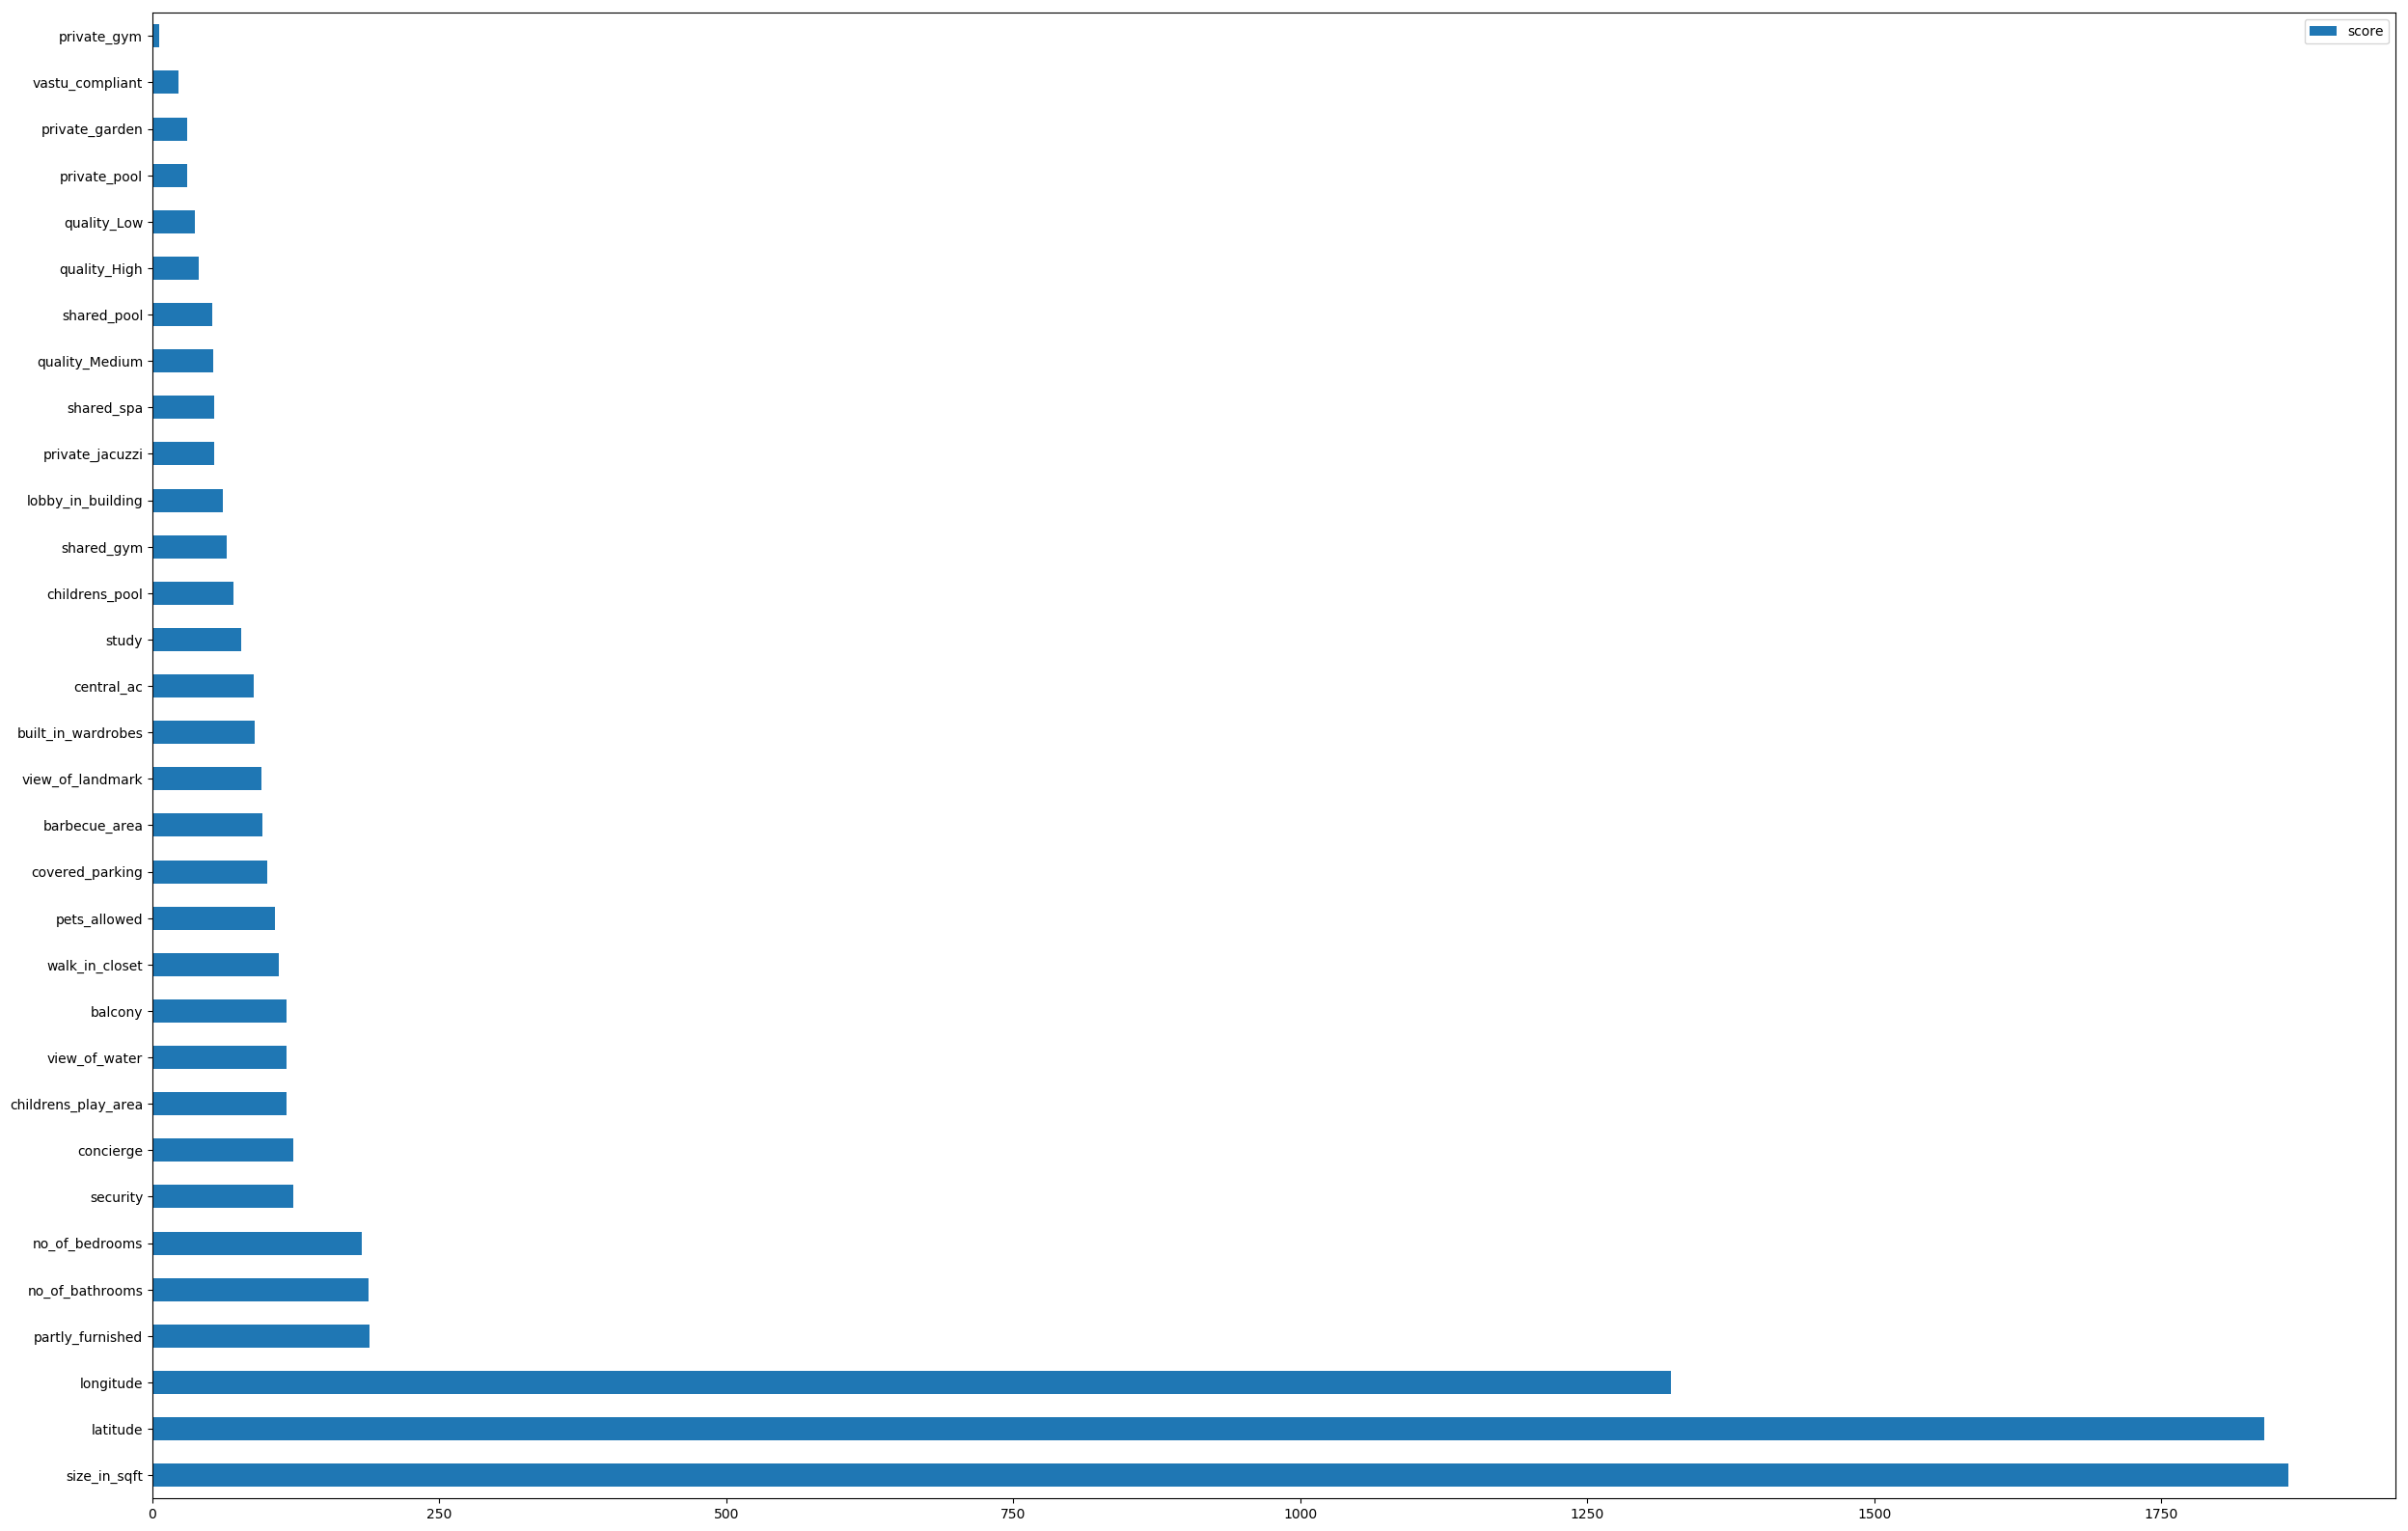

In [76]:
"""

from xgboost import plot_importance


fig = plt.figure(figsize=(115, 95))
plot_importance(xgbr_regressor,height=25.2)
plt.show()
"""
feature_important = xgbr_regressor.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (30,20)) ## plot top 40 features


In [77]:
"""
data = pd.DataFrame(columns=[X.columns.values,'bonjour'])
data.loc['latitude']=1.2
"""

"\ndata = pd.DataFrame(columns=[X.columns.values,'bonjour'])\ndata.loc['latitude']=1.2\n"

In [78]:
data.head()

,score
size_in_sqft,1861.0
latitude,1840.0
longitude,1323.0
partly_furnished,189.0
no_of_bathrooms,188.0


In [79]:
#data.

In [80]:
"""
import gradio as gr

def greet(latitude=0,longitude=0,size_in_sqft=0,no_of_bedrooms=1,no_of_bathrooms=1, view_of_water=True, unfurnished=False,covered_parking=False,pets_allowed=False, kitchen_appliances=False, concierge=False):
    print('bonjour')
    tab =['latitude','longitude','size_in_sqft','no_of_bedrooms','no_of_bathrooms','covered_parking','unfurnished','concierge','kitchen_appliances','pets_allowed','view_of_water']
    print(latitude)
    print(longitude)
    print(unfurnished)
    dt = pd.DataFrame({'latitude': [latitude],
                        'longitude': [longitude],
                        'size_in_sqft':  [size_in_sqft],
                        'no_of_bedrooms':  [no_of_bedrooms],
                        'no_of_bathrooms':  [no_of_bathrooms],
                        'view_of_water':  [1] if view_of_water==True else [0],
                        'unfurnished':  [1] if unfurnished==True else [0],
                        'covered_parking':  [1] if covered_parking==True else [0],
                        'pets_allowed': [1] if pets_allowed==True else [0],
                        'kitchen_appliances': [1] if kitchen_appliances==True else [0],
                        'concierge': [1] if concierge==True else [0]
                        } )
    
         #print('X.columns',X.columns)
    
    dt.head        
    print(dt['latitude'])
    print(X.shape)
    
    
    filename = 'GradientBoostingRegressor2.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.predict(dt)
    result = result[0] *0.27
         
    print('result',result) 
    #dt.head()
    return result   
    #gradient_predictions = gradient.predict(tab)
    #return gradient_predictions

demo = gr.Interface(
    fn=greet,
    inputs=["number", "number", "number", "number","number","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox"],
    outputs=["number"],
)
demo.launch()
"""

'\nimport gradio as gr\n\ndef greet(latitude=0,longitude=0,size_in_sqft=0,no_of_bedrooms=1,no_of_bathrooms=1, view_of_water=True, unfurnished=False,covered_parking=False,pets_allowed=False, kitchen_appliances=False, concierge=False):\n    print(\'bonjour\')\n    tab =[\'latitude\',\'longitude\',\'size_in_sqft\',\'no_of_bedrooms\',\'no_of_bathrooms\',\'covered_parking\',\'unfurnished\',\'concierge\',\'kitchen_appliances\',\'pets_allowed\',\'view_of_water\']\n    print(latitude)\n    print(longitude)\n    print(unfurnished)\n    dt = pd.DataFrame({\'latitude\': [latitude],\n                        \'longitude\': [longitude],\n                        \'size_in_sqft\':  [size_in_sqft],\n                        \'no_of_bedrooms\':  [no_of_bedrooms],\n                        \'no_of_bathrooms\':  [no_of_bathrooms],\n                        \'view_of_water\':  [1] if view_of_water==True else [0],\n                        \'unfurnished\':  [1] if unfurnished==True else [0],\n                  

In [81]:
#keras
from tensorflow import keras
from PIL import ImageFont
#from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import Dense, Activation, Flatten

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [82]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4352      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 169,217
Trainable params: 169,217
Non-trainable params: 0
_________________________________________________________________


In [83]:

checkpoint_name = 'Weights--rent-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


In [84]:
history = NN_model.fit(X, y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
34/41 [=======================>......] - ETA: 0s - loss: 152174.1250 - mean_absolute_error: 152174.1250
Epoch 1: val_loss improved from inf to 102012.82812, saving model to Weights--rent-001--102012.82812.hdf5
41/41 [==============================] - 9s 45ms/step - loss: 150358.1406 - mean_absolute_error: 150358.1406 - val_loss: 102012.8281 - val_mean_absolute_error: 102012.8281
Epoch 2/500
41/41 [==============================] - ETA: 0s - loss: 75637.6797 - mean_absolute_error: 75637.6797
Epoch 2: val_loss improved from 102012.82812 to 75325.64844, saving model to Weights--rent-002--75325.64844.hdf5
41/41 [==============================] - 1s 16ms/step - loss: 75637.6797 - mean_absolute_error: 75637.6797 - val_loss: 75325.6484 - val_mean_absolute_error: 75325.6484
Epoch 3/500
39/41 [===========================>..] - ETA: 0s - loss: 71616.6797 - mean_absolute_error: 71616.6797
Epoch 3: val_loss did not improve from 75325.64844
41/41 [==============================] - 0s 10

Text(0,0.5,'MAE')

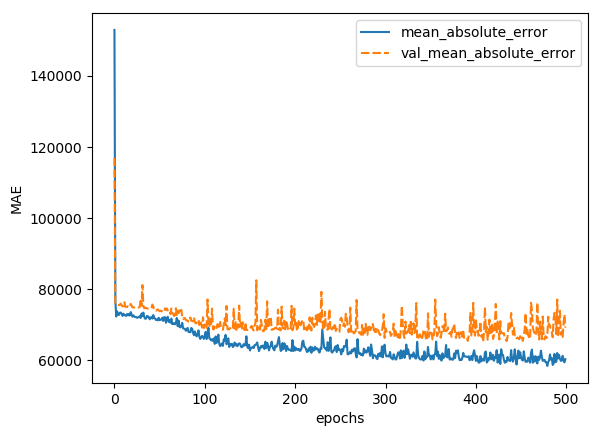

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['mean_absolute_error', 'val_mean_absolute_error']])
plt.xlabel("epochs")
plt.ylabel("MAE")